# Árboles de Decisión


### Librerías a utilizar:

- C50
- caret

### ¿Qué es un aŕbol de decisión?


### ¿Cuándo los utilizo?

In [1]:
library("C50")
library("caret")

Loading required package: lattice
Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [2]:
columns = c("area", "perimeter", "compactness", "length", "width", "AC", "lengthGroove", "class")
url = "https://www.dl.dropboxusercontent.com/s/wrexlo5im3g5ioi/seeds_dataset.csv"
seeds = read.csv(url, header = F, sep=",", col.names = columns)
seeds$class = factor(seeds$class, levels = c(1,2,3), labels = c("Kama", "Rosa", "Canadian"))

In [3]:
training.index = createDataPartition(seeds$class, p=0.7)$Resample1
training.set = seeds[training.index, ]
test.set = seeds[-training.index, ]
tree = C5.0(class ~ ., training.set)
tree.rules = C5.0(x = training.set[, -8], y = training.set$class, rules = T)
tree.pred.class = predict(tree, test.set[,-8], type = "class")
tree.pred.prob = predict(tree, test.set[,-8], type = "prob")

In [4]:
tree.pred.class

[1] Kama     Kama     Kama     Kama     Kama     Kama     Kama     Kama    
 [9] Canadian Kama     Kama     Kama     Kama     Kama     Kama     Kama    
[17] Kama     Kama     Kama     Canadian Kama     Rosa     Rosa     Rosa    
[25] Rosa     Rosa     Rosa     Rosa     Rosa     Rosa     Rosa     Rosa    
[33] Rosa     Rosa     Rosa     Rosa     Rosa     Kama     Rosa     Rosa    
[41] Rosa     Rosa     Canadian Canadian Kama     Canadian Canadian Canadian
[49] Kama     Kama     Canadian Canadian Canadian Canadian Canadian Canadian
[57] Canadian Kama     Canadian Canadian Canadian Canadian Canadian
Levels: Kama Rosa Canadian

In [5]:
head(tree.pred.prob)

,Kama,Rosa,Canadian
1,0.959349594,0.032520325,0.008130081
2,0.959349594,0.032520325,0.008130081
4,0.959349594,0.032520325,0.008130081
6,0.959349594,0.032520325,0.008130081
8,0.959349594,0.032520325,0.008130081
13,0.959349594,0.032520325,0.008130081
18,0.959349594,0.032520325,0.008130081
19,0.959349594,0.032520325,0.008130081
20,0.007751938,0.007751938,0.984496124
27,0.777777772,0.027777779,0.194444450



Call:
C5.0.formula(formula = class ~ ., data = training.set)


C5.0 [Release 2.07 GPL Edition]  	Wed Jul 29 21:17:14 2020
-------------------------------

Class specified by attribute `outcome'

Read 147 cases (8 attributes) from undefined.data

Decision tree:

lengthGroove > 5.533: Rosa (49/1)
lengthGroove <= 5.533:
:...area > 13.37: Kama (40/1)
    area <= 13.37:
    :...AC > 3.533: Canadian (42)
        AC <= 3.533:
        :...lengthGroove <= 5.097: Kama (11/2)
            lengthGroove > 5.097: Canadian (5)


Evaluation on training data (147 cases):

	    Decision Tree   
	  ----------------  
	  Size      Errors  

	     5    4( 2.7%)   <<


	   (a)   (b)   (c)    <-classified as
	  ----  ----  ----
	    48     1          (a): class Kama
	     1    48          (b): class Rosa
	     2          47    (c): class Canadian


	Attribute usage:

	100.00%	lengthGroove
	 66.67%	area
	 39.46%	AC


Time: 0.0 secs


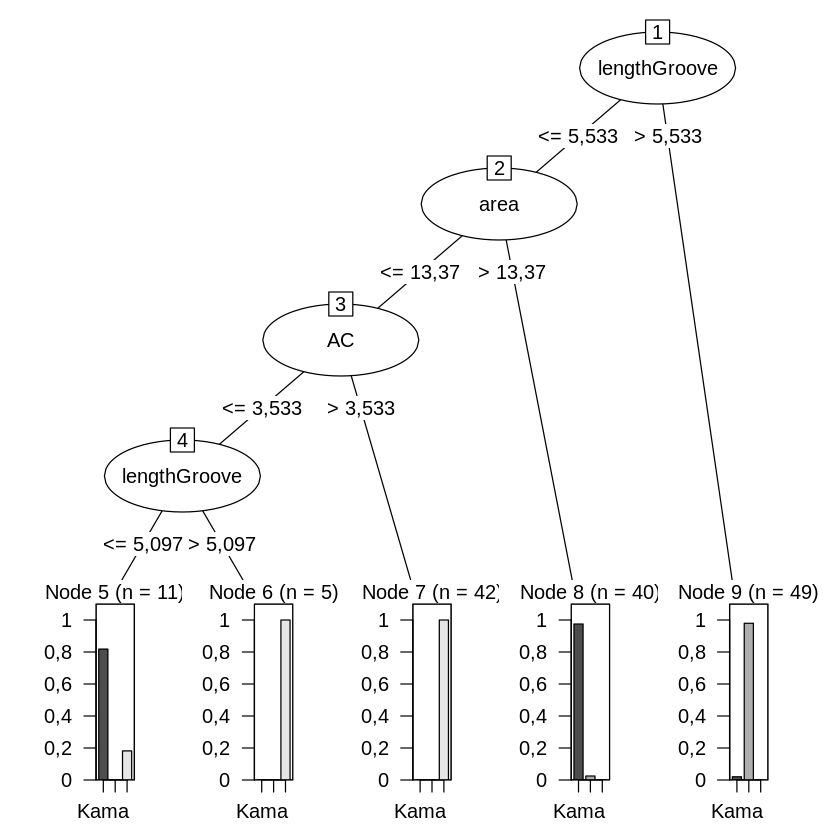

In [6]:
plot(tree)
summary(tree)

In [7]:
summary(tree.rules)


Call:
C5.0.default(x = training.set[, -8], y = training.set$class, rules = T)


C5.0 [Release 2.07 GPL Edition]  	Wed Jul 29 21:17:14 2020
-------------------------------

Class specified by attribute `outcome'

Read 147 cases (8 attributes) from undefined.data

Rules:

Rule 1: (40/1, lift 2.9)
	area > 13.37
	lengthGroove <= 5.533
	->  class Kama  [0.952]

Rule 2: (23/2, lift 2.6)
	AC <= 3.533
	lengthGroove <= 5.097
	->  class Kama  [0.880]

Rule 3: (49/1, lift 2.9)
	lengthGroove > 5.533
	->  class Rosa  [0.961]

Rule 4: (42, lift 2.9)
	area <= 13.37
	AC > 3.533
	->  class Canadian  [0.977]

Rule 5: (28, lift 2.9)
	area <= 13.37
	lengthGroove > 5.097
	->  class Canadian  [0.967]

Default class: Kama


Evaluation on training data (147 cases):

	        Rules     
	  ----------------
	    No      Errors

	     5    4( 2.7%)   <<


	   (a)   (b)   (c)    <-classified as
	  ----  ----  ----
	    48     1          (a): class Kama
	     1    48          (b): class Rosa
	     2          47  

In [8]:
conf.matrix.tree = confusionMatrix(table(test.set$class, tree.pred.class))
print(conf.matrix.tree)

Confusion Matrix and Statistics

          tree.pred.class
           Kama Rosa Canadian
  Kama       19    0        2
  Rosa        1   20        0
  Canadian    4    0       17

Overall Statistics
                                          
               Accuracy : 0,8889          
                 95% CI : (0,7844, 0,9541)
    No Information Rate : 0,381           
    P-Value [Acc > NIR] : < 2,2e-16       
                                          
                  Kappa : 0,8333          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: Kama Class: Rosa Class: Canadian
Sensitivity               0,7917      1,0000          0,8947
Specificity               0,9487      0,9767          0,9091
Pos Pred Value            0,9048      0,9524          0,8095
Neg Pred Value            0,8810      1,0000          0,9524
Prevalence                0,3810      0,3175          0,3016
Detection Rate           

# ¿Cómo mejoro los resultados?
- Mejorar training set (remuestreo; bagging, boosting, SMOTE)
- Tener árboles con distintas características (después juag)